## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV

## Read the data 

In [2]:
Data = pd.read_csv('data/creditcard.csv')

In [3]:
Data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

## Drop the variable we do not need

In [5]:
#Drop Time
dataset = Data.drop(['Time'],axis=1)

In [6]:
dataset.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,1.175161e-15,3.384974e-16,-1.379537e-15,2.094852e-15,1.021879e-15,1.494498e-15,-5.620335e-16,1.149614e-16,-2.414189e-15,2.238554e-15,...,1.628620e-16,-3.576577e-16,2.618565e-16,4.473914e-15,5.109395e-16,1.686100e-15,-3.661401e-16,-1.227452e-16,88.349619,0.001727
std,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


array([[<Axes: title={'center': 'V1'}>, <Axes: title={'center': 'V2'}>,
        <Axes: title={'center': 'V3'}>, <Axes: title={'center': 'V4'}>,
        <Axes: title={'center': 'V5'}>],
       [<Axes: title={'center': 'V6'}>, <Axes: title={'center': 'V7'}>,
        <Axes: title={'center': 'V8'}>, <Axes: title={'center': 'V9'}>,
        <Axes: title={'center': 'V10'}>],
       [<Axes: title={'center': 'V11'}>, <Axes: title={'center': 'V12'}>,
        <Axes: title={'center': 'V13'}>, <Axes: title={'center': 'V14'}>,
        <Axes: title={'center': 'V15'}>],
       [<Axes: title={'center': 'V16'}>, <Axes: title={'center': 'V17'}>,
        <Axes: title={'center': 'V18'}>, <Axes: title={'center': 'V19'}>,
        <Axes: title={'center': 'V20'}>],
       [<Axes: title={'center': 'V21'}>, <Axes: title={'center': 'V22'}>,
        <Axes: title={'center': 'V23'}>, <Axes: title={'center': 'V24'}>,
        <Axes: title={'center': 'V25'}>],
       [<Axes: title={'center': 'V26'}>, <Axes: title={'cen

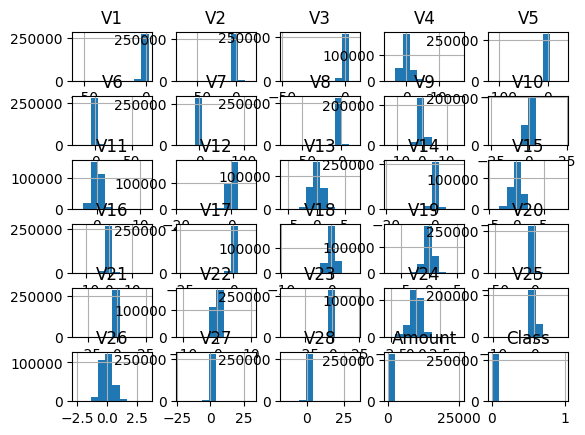

In [7]:
dataset.hist()

## Plot Correlation chart

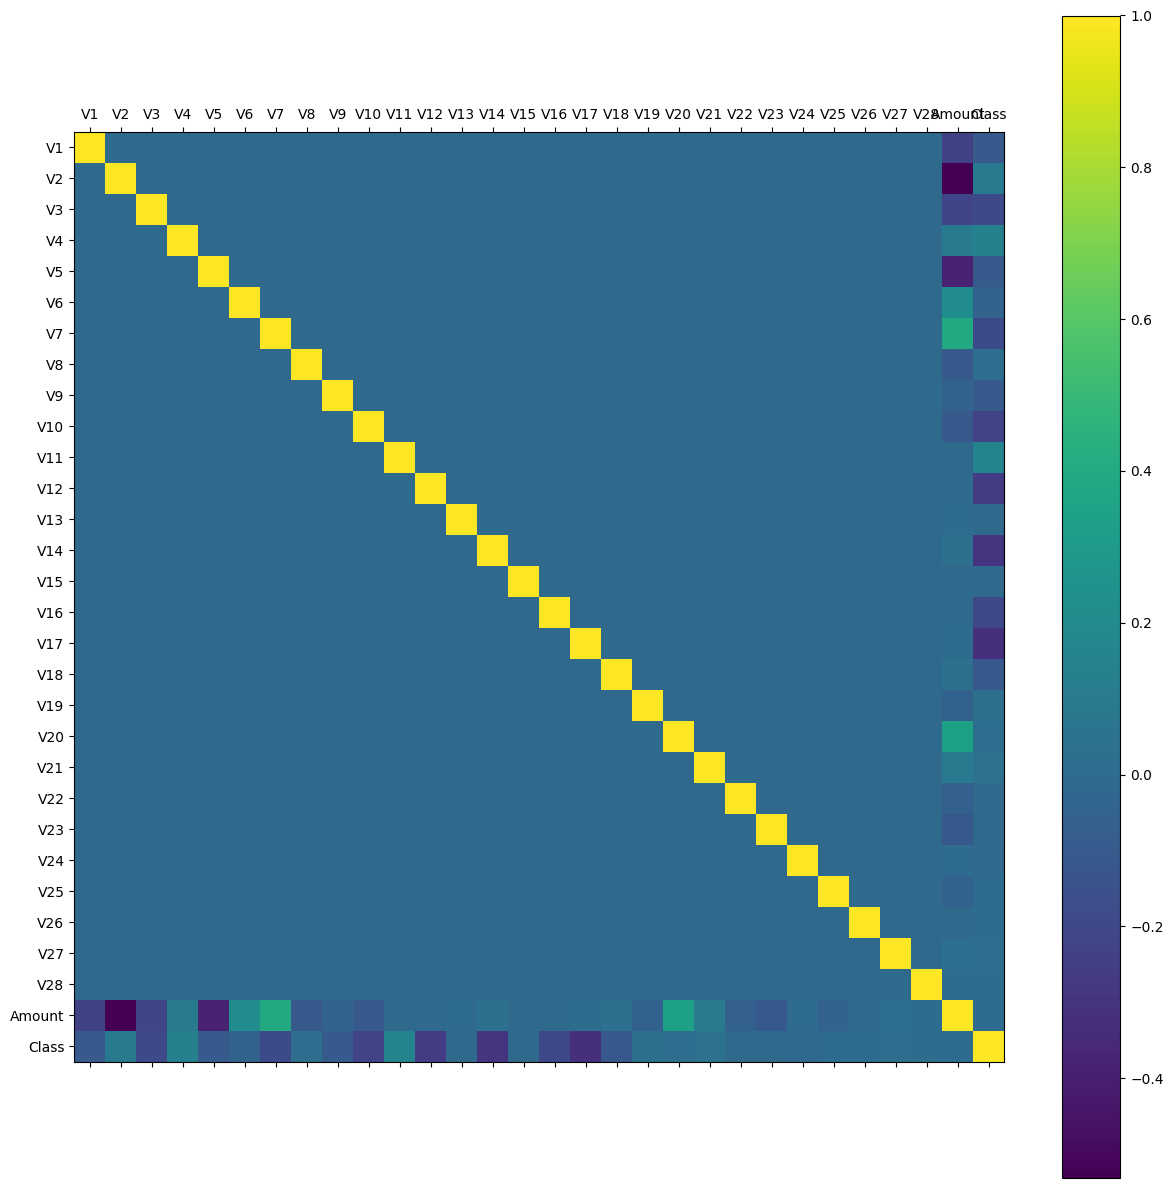

In [8]:
rcParams['figure.figsize'] = 10,15  #10 15
rcParams["figure.dpi"]= 100
plt.matshow(dataset.corr())
plt.yticks(np.arange(dataset.shape[1]), dataset.columns)
plt.xticks(np.arange(dataset.shape[1]), dataset.columns)
plt.colorbar()

## Know the classes or levels of the variable (Transaction)

In [9]:
dataset['Class'].unique()

array([0, 1])

## Get the count of the classes or levels

In [10]:
import os
import plotly.graph_objects as go
# Ensure the folder exists
os.makedirs("visualization", exist_ok=True)
# Extract counts
classes = dataset['Class'].unique()
counts = dataset['Class'].value_counts().loc[classes].values

fig = go.Figure(
    data=[
        go.Bar(
            x=classes,
            y=counts,
            marker=dict(color=['red', 'green'])
        )])
fig.update_layout(
    title="Count of each Target Class",
    xaxis_title="Target Classes",
    yaxis_title="Count",
    width=800,
    height=500
)
fig.write_html(os.path.join("visualization", "class_counts.html"))


### Split the Data to X and Y and Train and testing

In [11]:
y = dataset['Class']
X = dataset.drop(['Class'], axis = 1)
#Split the dataset in training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

###  dataset has 492 frauds out of 284,807 transactions, so frauds are about 0.172% of the data. With a random 80/20 split, the test set will have roughly 0.2×492≈98 frauds

In [12]:
#Isolation Forest
#Key Concept: Anomalies require fewer splits to isolate.
from sklearn.ensemble import IsolationForest

contamination = y.sum() / len(y)  
iso_forest = IsolationForest(
    n_estimators=100,          
    max_samples='auto',         
    contamination=contamination, # Critical parameter!
    random_state=42,
    n_jobs=-1                   # Use all cores
)
iso_forest.fit(X_train)
iso_scores_test = iso_forest.score_samples(X_test)  # Negative = anomaly
iso_preds_test = iso_forest.predict(X_test)  # -1=anomaly, 1=normal
iso_binary = (iso_preds_test == -1).astype(int)
print(f"Anomalies detected: {(iso_binary == 1).sum()}")

Anomalies detected: 106


In [13]:
# 3.2 Local Outlier Factor (LOF)
#Key Concept: Anomalies have lower density than neighbors.
from sklearn.neighbors import LocalOutlierFactor
lof_model = LocalOutlierFactor(
    n_neighbors=20,              
    contamination=contamination,
    novelty=True,                
    n_jobs=-1
)
lof_model.fit(X_train)
lof_scores_test = lof_model.score_samples(X_test)
lof_preds_test = lof_model.predict(X_test)
lof_binary = (lof_preds_test == -1).astype(int)

print(f"Anomalies detected: {(lof_binary == 1).sum()}")

c:\Users\Zyad Diab\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but LocalOutlierFactor was fitted with feature names

c:\Users\Zyad Diab\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but LocalOutlierFactor was fitted with feature names



Anomalies detected: 97


In [14]:
X_train_normal = X_train[y_train == 0]
# just to check the training set for AE
# there are 284,807 normal transactions, 284,315 normal and 492 fraud
# so 0.8×284,315≈227,452
print(f"Normal transactions for AE training: {len(X_train_normal)}")

Normal transactions for AE training: 227454


In [15]:
#Autoencoder
#key concept: Train on normal data; anomalies have high reconstruction error.
import tensorflow as tf
from tensorflow.keras import layers, models
# Architecture: Compression -> Bottleneck -> Decompression
input_dim = X_train.shape[1]  # 29 features
autoencoder = models.Sequential([
    layers.Input(shape=(input_dim,)),
    layers.Dense(32, activation='relu', name='encoder1'),
    layers.Dense(16, activation='relu', name='encoder2'),
    layers.Dense(8, activation='relu', name='bottleneck'),  # Compress
    layers.Dense(16, activation='relu', name='decoder1'),
    layers.Dense(32, activation='relu', name='decoder2'),
    layers.Dense(input_dim, activation='linear', name='output')
])
autoencoder.compile(
    optimizer='adam',
    loss='mse'  # Reconstruction loss
)
history = autoencoder.fit(
    X_train_normal, X_train_normal,
    epochs=10,
    batch_size=256,
    validation_split=0.2,
    shuffle=True,
    verbose=1
)
print(autoencoder.summary())

Epoch 1/10
711/711 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1249.1080 - val_loss: 0.9236
Epoch 2/10
711/711 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1516 - val_loss: 0.9030
Epoch 3/10
711/711 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8538 - val_loss: 0.7529
Epoch 4/10
711/711 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.9525 - val_loss: 0.7543
Epoch 5/10
711/711 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1313 - val_loss: 0.7777
Epoch 6/10
711/711 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.9494 - val_loss: 0.6800
Epoch 7/10
711/711 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0158 - val_loss: 0.8314
Epoch 8/10
711/711 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7917 - val_loss: 0.5785
Epoch 9/10
711/711 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.4533 - val_loss: 1.8563
Epoch 10/10
711/711 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6950 - val_loss: 0.7065


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ encoder1 (Dense)                │ (None, 32)             │           960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder2 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bottleneck (Dense)              │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder1 (Dense)                │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder2 (Dense)                │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 29)             │           957 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,809 (38.32 KB)

 Trainable params: 3,269 (12.77 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,540 (25.55 KB)

None


Reconstruction Error Statistics:
  Mean: 0.763290
  Median: 0.424082
the mean is larger than the median because a few extreme outliers 
(very badly reconstructed points) pull the average up
--------------------------------------------------
  Std: 9.789670
The standard deviation is large compared to the mean because
 of those rare points with very high error
--------------------------------------------------
  95th percentile: 1.575841
95% of the test transactions have reconstruction error ≤ 1.09,
 and 5% have higher error


C:\Users\Zyad Diab\AppData\Local\Temp\ipykernel_8528\2586707662.py:33: MatplotlibDeprecationWarning:

The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.



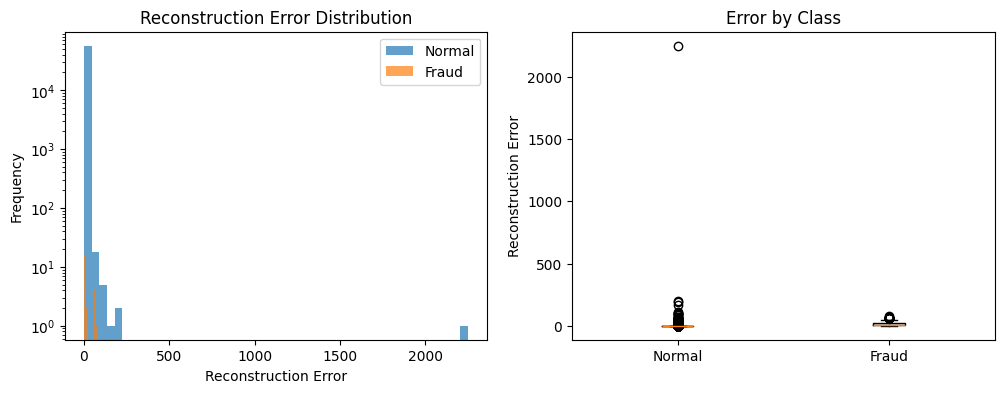

In [16]:
from matplotlib import pyplot as plt
X_test_pred = autoencoder.predict(X_test, verbose=0)
# Calculate Mean Squared Error for each sample
reconstruction_error = np.mean((X_test - X_test_pred) ** 2, axis=1)

print(f"Reconstruction Error Statistics:")
print(f"  Mean: {reconstruction_error.mean():.6f}")
print(f"  Median: {np.median(reconstruction_error):.6f}")
print(f"the mean is larger than the median because a few extreme outliers \n(very badly reconstructed points) pull the average up")
print("-"*50)
print(f"  Std: {reconstruction_error.std():.6f}")
print(f"The standard deviation is large compared to the mean because\n of those rare points with very high error")
print("-"*50)
#percentile is just a threshold not an accuracy
print(f"  95th percentile: {np.percentile(reconstruction_error, 95):.6f}")
print(f"95% of the test transactions have reconstruction error ≤ 1.09,\n and 5% have higher error")

# Visualize
plt.figure(figsize=(12, 4))

# Histogram by class
plt.subplot(1, 2, 1)
plt.hist(reconstruction_error[y_test == 0], bins=50, alpha=0.7, label='Normal')
plt.hist(reconstruction_error[y_test == 1], bins=50, alpha=0.7, label='Fraud')
plt.xlabel('Reconstruction Error')
plt.ylabel('Frequency')
plt.title('Reconstruction Error Distribution')
plt.legend()
plt.yscale('log')  # Log scale for visibility

# Box plot
plt.subplot(1, 2, 2)
plt.boxplot([reconstruction_error[y_test == 0], reconstruction_error[y_test == 1]],
            labels=['Normal', 'Fraud'])
plt.ylabel('Reconstruction Error')
plt.title('Error by Class')
plt.show()

In [17]:
# Strategy 1: Percentile-based (most common)
threshold_p95 = np.percentile(reconstruction_error, 95)
threshold_p99 = np.percentile(reconstruction_error, 99)

# Strategy 2: Statistical (mean + k*std)
threshold_mean = reconstruction_error.mean() + 3 * reconstruction_error.std()

# Strategy 3: ROC-based (optimize for specific metric)
#here we use true labels to find the optimal threshold
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, reconstruction_error)
j_scores = tpr - fpr  # Youden's J statistic
optimal_idx = np.argmax(j_scores)
threshold_optimal = thresholds[optimal_idx]

# Use 95th percentile (balance between recall and precision)
ae_threshold = threshold_p95
ae_preds = (reconstruction_error > ae_threshold).astype(int)

print(f"Thresholds:")
print(f"  95th percentile: {threshold_p95:.6f}")
print(f"  99th percentile: {threshold_p99:.6f}")
print(f"  Mean + 3*std: {threshold_mean:.6f}")
print(f"  ROC-optimal: {threshold_optimal:.6f}")
print(f"\nUsing: {ae_threshold:.6f}")

Thresholds:
  95th percentile: 1.575841
  99th percentile: 4.793436
  Mean + 3*std: 30.132298
  ROC-optimal: 1.403001

Using: 1.575841


In [18]:
from sklearn.metrics import (
    confusion_matrix, classification_report, 
    roc_auc_score, precision_recall_curve, auc
)

def evaluate_model(y_true, y_pred, model_name):
    """Comprehensive model evaluation"""
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()
    
    print(f"\n{'='*60}")
    print(f"{model_name}")
    print(f"{'='*60}")
    print(classification_report(y_true, y_pred, target_names=['Normal', 'Fraud']))
    
    # Calculate custom metrics
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
    print(f"\nConfusion Matrix:")
    print(f"  True Negatives: {tn}")
    print(f"  False Positives: {fp}")
    print(f"  False Negatives: {fn}")
    print(f"  True Positives: {tp}")
    print(f"\nMetrics:")
    print(f"  Precision: {precision:.4f} (false alarm rate)")
    print(f"  Recall: {recall:.4f} (catch rate)")
    print(f"  Specificity: {specificity:.4f} (true negative rate)")
    print(f"  F1-Score: {f1:.4f}")
    
    return {
        'precision': precision, 'recall': recall, 
        'f1': f1, 'specificity': specificity
    }

# Evaluate all models
iso_results = evaluate_model(y_test, iso_binary, "Isolation Forest")
lof_results = evaluate_model(y_test, lof_binary, "Local Outlier Factor")
ae_results = evaluate_model(y_test, ae_preds, "Autoencoder")


Isolation Forest
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00     56861
       Fraud       0.20      0.21      0.20       101

    accuracy                           1.00     56962
   macro avg       0.60      0.60      0.60     56962
weighted avg       1.00      1.00      1.00     56962


Confusion Matrix:
  True Negatives: 56776
  False Positives: 85
  False Negatives: 80
  True Positives: 21

Metrics:
  Precision: 0.1981 (false alarm rate)
  Recall: 0.2079 (catch rate)
  Specificity: 0.9985 (true negative rate)
  F1-Score: 0.2029

Local Outlier Factor
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00     56861
       Fraud       0.00      0.00      0.00       101

    accuracy                           1.00     56962
   macro avg       0.50      0.50      0.50     56962
weighted avg       1.00      1.00      1.00     56962


Confusion Matrix:
  True Negatives: 56764
  False Positi

## So In conclusion
##### for **Isolation Forest**:it rarely flags fraud correctly (low recall), but doesn’t make many mistakes on normal transaction so its Good for avoiding false alarms, but bad at actually catching fraud
##### for **LOF**:it completely failed to detect fraud on this dataset and shouldnt be used at all
#### for **AutoEncoder**:it catches most of the frauds (high recall),But it also flags many normal transactions as fraud (low precision)




In [19]:
iso_roc_auc = roc_auc_score(y_test, iso_scores_test)
lof_roc_auc = roc_auc_score(y_test, lof_scores_test)
ae_roc_auc = roc_auc_score(y_test, reconstruction_error)

# Precision-Recall AUC: Focus on minority class (better for imbalanced)
iso_precision, iso_recall, _ = precision_recall_curve(y_test, iso_scores_test)
iso_pr_auc = auc(iso_recall, iso_precision)

lof_precision, lof_recall, _ = precision_recall_curve(y_test, lof_scores_test)
lof_pr_auc = auc(lof_recall, lof_precision)

ae_precision, ae_recall, _ = precision_recall_curve(y_test, reconstruction_error)
ae_pr_auc = auc(ae_recall, ae_precision)

print(f"\n{'='*60}")
print("Area Under Curve Scores")
print(f"{'='*60}")
print(f"{'Model':<20} {'ROC-AUC':<12} {'PR-AUC':<12}")
print(f"{'-'*44}")
print(f"{'Isolation Forest':<20} {iso_roc_auc:<12.4f} {iso_pr_auc:<12.4f}")
print(f"{'LOF':<20} {lof_roc_auc:<12.4f} {lof_pr_auc:<12.4f}")
print(f"{'Autoencoder':<20} {ae_roc_auc:<12.4f} {ae_pr_auc:<12.4f}")


Area Under Curve Scores
Model                ROC-AUC      PR-AUC      
--------------------------------------------
Isolation Forest     0.0437       0.0009      
LOF                  0.3309       0.0012      
Autoencoder          0.9604       0.1873      


## now we switch to supervised models, decision tree

In [20]:
Hyper_paramters={
    'criterion': ['entropy'],
    'max_depth': [3],
    'min_samples_split': [2],
    'min_samples_leaf': [1],
    'class_weight': ['balanced']
    }
#Define the five fold Cross Validation
Tree_Gridsearch_paramters=GridSearchCV(
                                       estimator=DecisionTreeClassifier(random_state=42),
                                       param_grid=Hyper_paramters,
                                       scoring='roc_auc',
                                       n_jobs=-1,
                                       cv=5,
                                       verbose=2
                                       )
Tree_crossvalidation=Tree_Gridsearch_paramters.fit(X_train,y_train)

Final_Model=Tree_crossvalidation.best_estimator_
print ("The best paramter combination is ")
print(Tree_crossvalidation.best_params_)  
print("The best AUC score was ")
print(f"{Tree_crossvalidation.best_score_:.4f}")    

Fitting 5 folds for each of 1 candidates, totalling 5 fits
The best paramter combination is 
{'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
The best AUC score was 
0.9632


### Train the Random Forst Model

In [22]:
from sklearn.ensemble import RandomForestClassifier
param_grid = {
    'n_estimators': [50,60,70],
    'max_depth': [10],
    'min_samples_split': [2],
    'min_samples_leaf': [1],
    'max_features': ['sqrt'],
    'criterion': ['entropy']
}
rf = RandomForestClassifier(
    random_state=42,
    n_jobs=-1
)
RF_GridSearch = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1,
    verbose=2
)
RF_cv = RF_GridSearch.fit(X_train, y_train)
Final_Model = RF_cv.best_estimator_

print("Best parameter combination:")
print(RF_cv.best_params_)

print("\nBest cross-validated ROC-AUC:")
print(f"{RF_cv.best_score_:.4f}")

feature_importance = (
    pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': Final_Model.feature_importances_
    })
    .sort_values(by='Importance', ascending=False)
)

feature_importance.head(10)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best parameter combination:
{'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 60}

Best cross-validated ROC-AUC:
0.9791


,Feature,Importance
13,V14,0.176701
16,V17,0.142086
9,V10,0.126627
11,V12,0.105157
15,V16,0.075015
10,V11,0.073053
3,V4,0.042828
6,V7,0.034709
2,V3,0.024679
8,V9,0.023162


# Predict using the best model (The last model trained)

In [30]:
import numpy as np
from sklearn.metrics import roc_auc_score

# Store cross-validation results
dt_best_score = Tree_crossvalidation.best_score_
rf_best_score = RF_cv.best_score_

print("=" * 60)
print("MODEL COMPARISON - Cross-Validation ROC-AUC Scores")
print("=" * 60)
print(f"Decision Tree CV ROC-AUC: {dt_best_score:.4f}")
print(f"Random Forest CV ROC-AUC:  {rf_best_score:.4f}")
print("-" * 60)

# Select the best model
if dt_best_score > rf_best_score:
    Best_Model = Tree_crossvalidation.best_estimator_
    best_model_name = "Decision Tree"
    best_score = dt_best_score
    improvement = dt_best_score - rf_best_score
else:
    Best_Model = RF_cv.best_estimator_
    best_model_name = "Random Forest"

# Optional: Evaluate on test set to confirm
if 'X_test' in locals() and 'y_test' in locals():
    y_pred_proba = Best_Model.predict_proba(X_test)[:, 1]
    test_roc_auc = roc_auc_score(y_test, y_pred_proba)
    print(f"\nTest Set ROC-AUC: {test_roc_auc:.4f}")

print("=" * 60)
print("CLASSIFICATION REPORT - Random Forest")
print("=" * 60)
print(classification_report(y_test, y_pred, digits=4))
print("=" * 60)
print(f"ROC-AUC Score: {roc_auc:.4f}")
print(f"PR-AUC Score:  {pr_auc:.4f}")
print("=" * 60)



MODEL COMPARISON - Cross-Validation ROC-AUC Scores
Decision Tree CV ROC-AUC: 0.9632
Random Forest CV ROC-AUC:  0.9791
------------------------------------------------------------

Test Set ROC-AUC: 0.9799
CLASSIFICATION REPORT - Random Forest
              precision    recall  f1-score   support

           0     0.9996    0.9999    0.9998     56861
           1     0.9205    0.8020    0.8571       101

    accuracy                         0.9995     56962
   macro avg     0.9601    0.9009    0.9285     56962
weighted avg     0.9995    0.9995    0.9995     56962

ROC-AUC Score: 0.9799
PR-AUC Score:  0.8606


## Plot a confusion Matrix

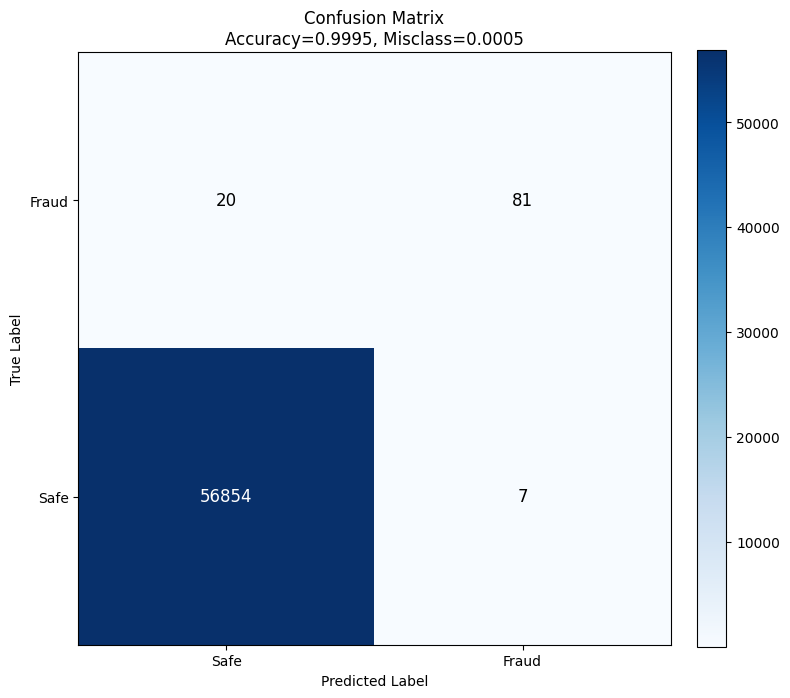

In [28]:
import numpy as np
import matplotlib.pyplot as plt

def plot_confusion_matrix_matplotlib(
    cm,
    target_names,
    title="Confusion Matrix",
    normalize=False,
    cmap="Blues",
    figsize=(8, 8)
):
    cm = np.array(cm)

    # Normalize if requested
    if normalize:
        cm_display = cm.astype(float) / cm.sum(axis=1, keepdims=True)
    else:
        cm_display = cm

    # ---- FLIP MATRIX VERTICALLY ----
    cm_display = np.flipud(cm_display)
    # Also flip label order on Y-axis
    target_names_flipped = list(reversed(target_names))

    # Metrics
    accuracy = np.trace(cm) / np.sum(cm)
    misclass = 1 - accuracy

    # Plot
    plt.figure(figsize=figsize)
    im = plt.imshow(cm_display, cmap=cmap)
    plt.colorbar(im, fraction=0.046, pad=0.04)

    plt.title(f"{title}\nAccuracy={accuracy:.4f}, Misclass={misclass:.4f}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")

    plt.xticks(np.arange(len(target_names)), target_names)
    plt.yticks(np.arange(len(target_names_flipped)), target_names_flipped)

    # Annotate cells
    threshold = cm_display.max() / 2.0
    for i in range(cm_display.shape[0]):
        for j in range(cm_display.shape[1]):
            value = cm_display[i, j]
            text = f"{value:.4f}" if normalize else f"{int(value)}"
            plt.text(
                j, i, text,
                ha="center", va="center",
                color="white" if value > threshold else "black",
                fontsize=12
            )

    plt.tight_layout()
    plt.show()
cm1 = confusion_matrix(y_test, y_pred)

plot_confusion_matrix_matplotlib(
    cm1,
    ["Safe", "Fraud"],
    normalize=False
)


# Plot ROC Curve

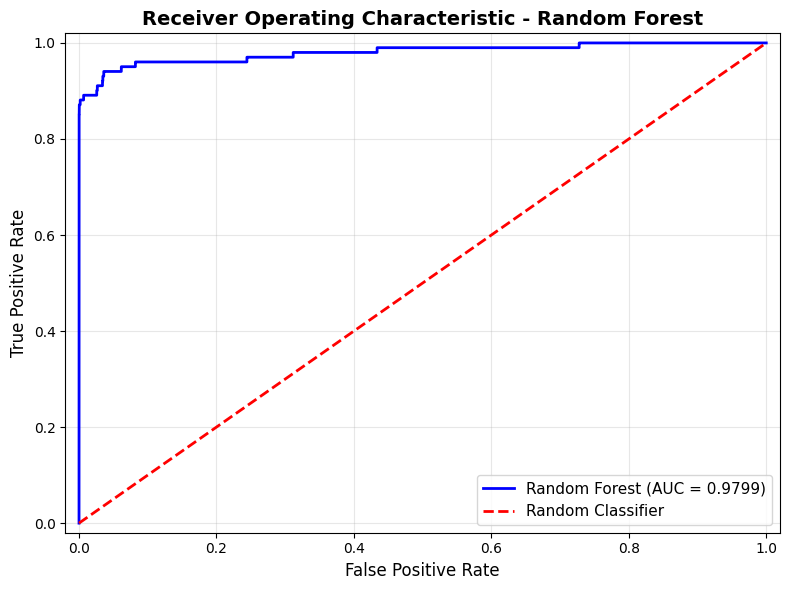

In [31]:
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc, 
                             roc_auc_score, roc_curve, recall_score, 
                             classification_report, ConfusionMatrixDisplay)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Get predictions
y_pred_proba = Final_Model.predict_proba(X_test)[:, 1]  # Probabilities for ROC
y_pred = Final_Model.predict(X_test)  # Class predictions for confusion matrix

plt.rcParams.update({'font.size': 10})

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.title('Receiver Operating Characteristic - Random Forest', fontsize=14, fontweight='bold')
plt.plot(fpr, tpr, 'b-', linewidth=2, label=f'Random Forest (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'r--', linewidth=2, label='Random Classifier')
plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.legend(loc='lower right', fontsize=11)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()